## 18 - Skew-T Fiduciary Lines

Watch video: [YouTube](https://www.youtube.com/watch?v=quFXzaNbWXM)

In [9]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
from siphon.simplewebservice.wyoming import WyomingUpperAir
from metpy.units import units, pandas_dataframe_to_unit_arrays
import metpy.calc as mpcalc
import metpy.plots as plots
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [10]:
date = datetime.datetime(2017, 9, 10)
df = WyomingUpperAir.request_data(date, 'BMX')
df = pandas_dataframe_to_unit_arrays(df)

In [11]:
p = df['pressure']
T = df['temperature']
Td = df['dewpoint']
u = df['u_wind']
v = df['v_wind']

In [12]:
interval = np.logspace(2, 3) * units.hPa
idx = mpcalc.resample_nn_1d(p, interval)

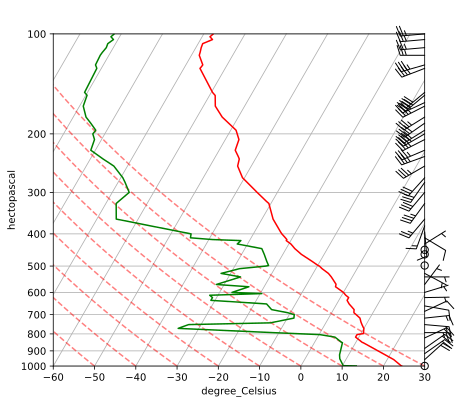

In [13]:
fig = plt.figure(1, figsize=(8, 6))
skew = plots.SkewT(fig)
skew.plot(p, T, 'red')
skew.plot(p, Td, 'green')
skew.ax.set_xlim(-60, 30)
skew.ax.set_ylim(1000, 100)
skew.plot_barbs(p[idx], u[idx], v[idx])
skew.plot_dry_adiabats()
plt.show()

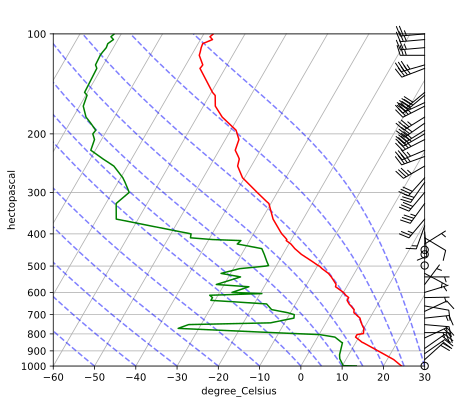

In [14]:
fig = plt.figure(2, figsize=(8, 6))
skew = plots.SkewT(fig)
skew.plot(p, T, 'red')
skew.plot(p, Td, 'green')
skew.ax.set_xlim(-60, 30)
skew.ax.set_ylim(1000, 100)
skew.plot_barbs(p[idx], u[idx], v[idx])
skew.plot_moist_adiabats()
plt.show()

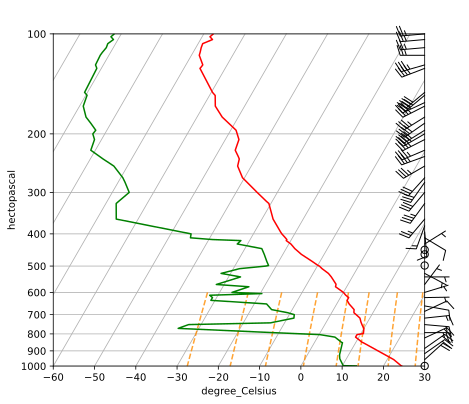

In [15]:
fig = plt.figure(3, figsize=(8, 6))
skew = plots.SkewT(fig)
skew.plot(p, T, 'red')
skew.plot(p, Td, 'green')
skew.ax.set_xlim(-60, 30)
skew.ax.set_ylim(1000, 100)
skew.plot_barbs(p[idx], u[idx], v[idx])
skew.plot_mixing_lines(colors='darkorange')
plt.show()

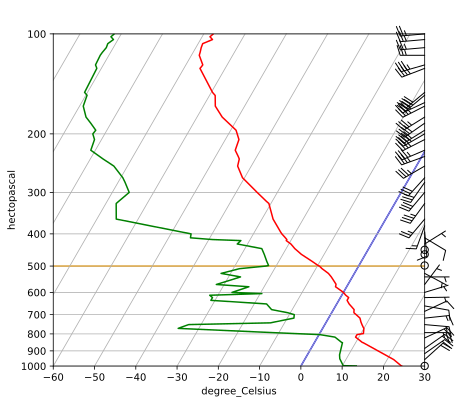

In [16]:
fig = plt.figure(4, figsize=(8, 6))
skew = plots.SkewT(fig)
skew.plot(p, T, 'red')
skew.plot(p, Td, 'green')
skew.ax.set_xlim(-60, 30)
skew.ax.set_ylim(1000, 100)
skew.plot_barbs(p[idx], u[idx], v[idx])
skew.ax.axhline(500 * units.hPa, color='orange', zorder=1)
skew.ax.axvline(0 * units.degC, color='blue', zorder=1)
plt.show()